In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Basic workflow and approach
The direction of PCA will give us the direction of spread of data, and thus in some sense the direction of an image.
Thus, we can calculate the direction of PCA of template image, direction of PCA of input image and then rotate the input image to match the direction of template image.


In [47]:
# Taking code from the template given in question 1 already

opt = {
    'image_size': 32,
    'is_grayscale': True,
}

def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def load_data(dir_path):
    image_list = []
    y_list = []
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('.')[0]
            
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [48]:
dirpath = '../assignment-2-ksr-0011/Data/KIMIA_dataset/'
image_list, label_list = load_data(dirpath)

Dataset shape: (99, 32, 32)
Label shape: (99,)


In [50]:
template_image = image_list[95]
input_image = image_list[87]

template_image.shape

(32, 32)

Text(0.5, 1.0, 'Original Image')

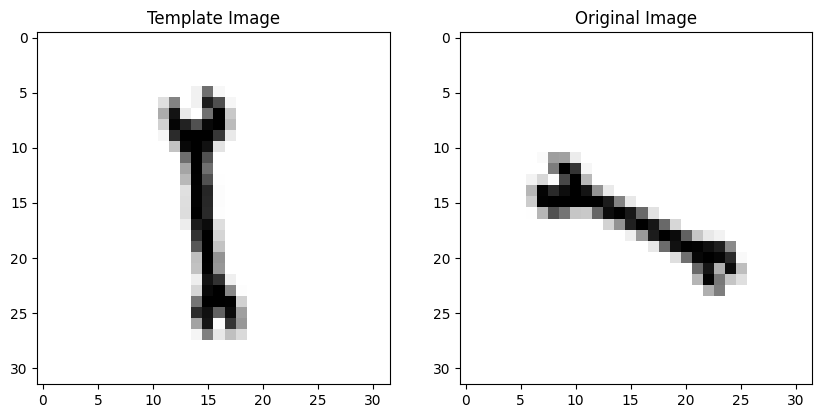

In [51]:
fig , axes = plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(template_image , cmap='gray' )
axes[1].imshow(input_image , cmap='gray')
axes[0].set_title('Template Image')
axes[1].set_title('Original Image')


#### Applying PCA

In [52]:
from sklearn.decomposition import PCA

pca_template = PCA(n_components = 2)
pca_template.fit(template_image)

pca_input = PCA(n_components = 2)
pca_input.fit(input_image)  

PCA(n_components=2)

#### Finding rotation angle

In [53]:
angle_template = np.arctan2(pca_template.components_[0][1],pca_template.components_[0][0])*180/np.pi
angle_input = np.arctan2(pca_input.components_[0][1],pca_input.components_[0][0])*180/np.pi

diff_angle = angle_template - angle_input


#### Finding center of image and rotating the image in the required direction with required angle around the center point.

Text(0.5, 1.0, 'Rotated Image')

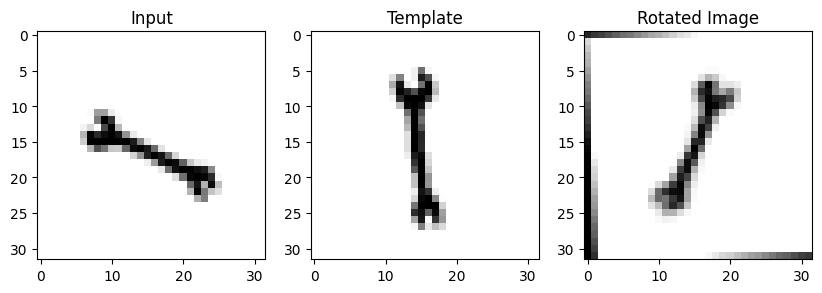

In [58]:
import cv2 as cv2

n, h, w = image_list.shape

Center = (w // 2, h // 2)
Scale = 1.0
Angle = diff_angle
rotation_matrix = cv2.getRotationMatrix2D(Center, Angle, Scale)
rotated_image = cv2.warpAffine(input_image, rotation_matrix, (w, h))

fig , axes = plt.subplots(1,3,figsize=(10,10))
axes[0].imshow(input_image , cmap='gray' )
axes[1].imshow(template_image, cmap='gray')
axes[2].imshow(rotated_image , cmap = 'gray')
axes[0].set_title('Input')
axes[1].set_title('Template')
axes[2].set_title('Rotated Image')


One example has been shown above.